# From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

# Unsupervised Learning

# Name - Ashima Gupta

# Import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets

# Load the iris dataset

In [5]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

# Plot the wcss to determine the optimal value of k

In [6]:
X = df.iloc[:,:].values

Text(0, 0.5, 'WCSS')

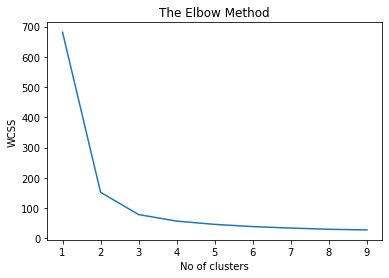

In [8]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
        
        
# Plotting the wcss(elbow method)
n = range(1,10)
plt.plot(n,wcss)
plt.title('The Elbow Method')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
        

# From the above graph we clearly see the value of k
# Apply kmeans for k=3

In [10]:
kmeans = KMeans(n_clusters=3)
kmeans.fit_predict(X)

print("Cluster's Center\n")
print(kmeans.cluster_centers_)


# Find count of each cluster
unique, counts = np.unique(kmeans.labels_, return_counts=True)
dict_data = dict(zip(unique, counts))
print("Count of each cluster")
print(dict_data)

Cluster's Center

[[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]
Count of each cluster
{0: 38, 1: 50, 2: 62}


# Plot the clusters for first two features

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


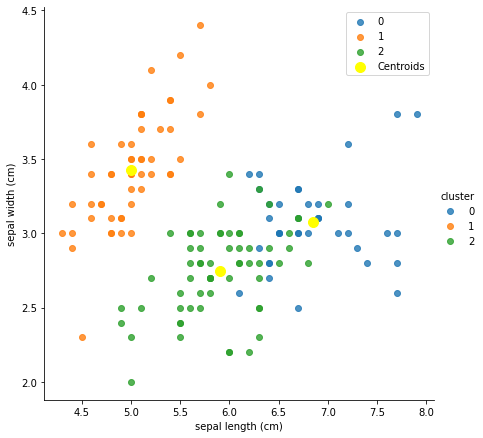

In [18]:
import seaborn as sns
df["cluster"] = kmeans.labels_
sns.lmplot('sepal length (cm)', 'sepal width (cm)',data=df,
           hue='cluster',  size=6, aspect=1, fit_reg=False)

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()